In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [8]:
train = pd.read_csv(r'C:\Users\tegae\Documents\Python Tutorials\Python Bootcamp Files\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv')

In [9]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

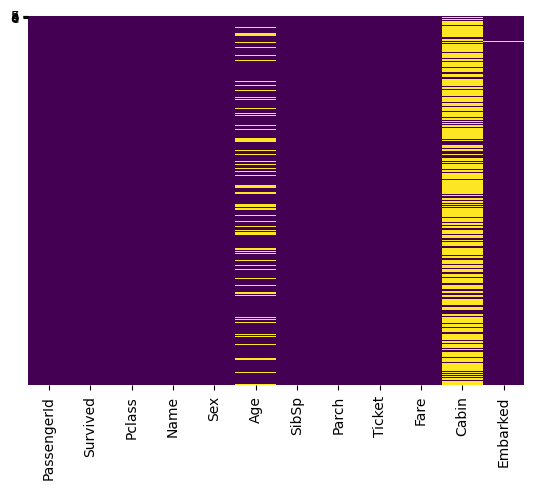

In [14]:
sns.heatmap(train.isnull(),cbar=False,yticklabels='False',cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

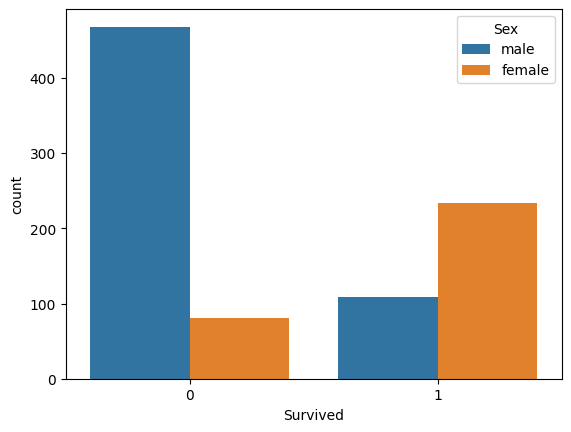

In [18]:
sns.countplot(train,x='Survived',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

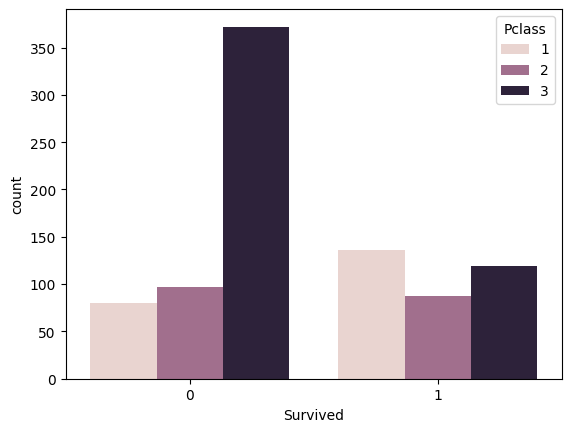

In [19]:
sns.countplot(train,x='Survived',hue='Pclass')

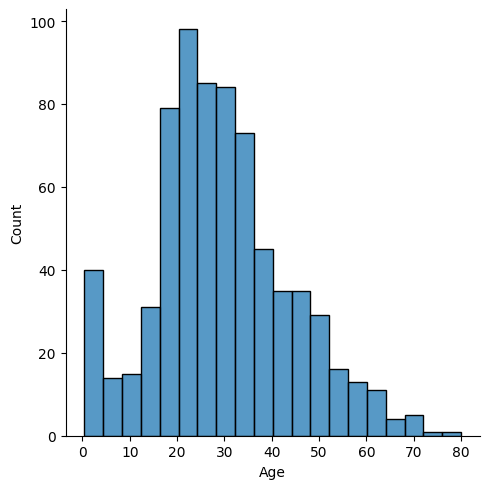

In [33]:
sns.displot(train.dropna(subset='Age'),x='Age')

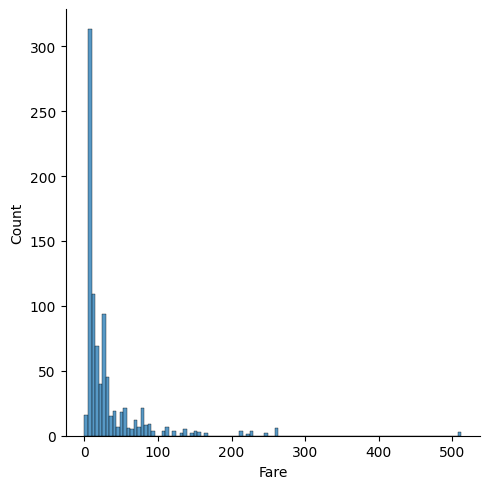

In [26]:
sns.displot(train,x='Fare')

<Axes: >

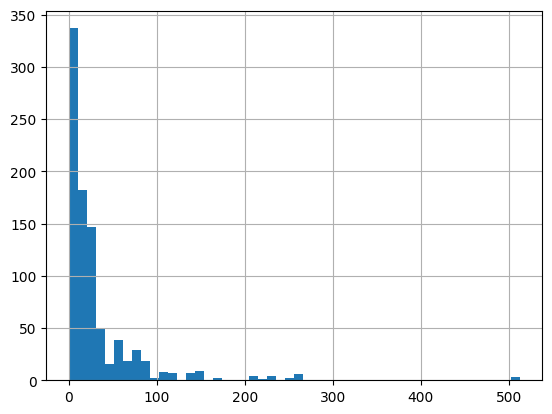

In [28]:
train['Fare'].hist(bins=50)

<Axes: xlabel='SibSp', ylabel='count'>

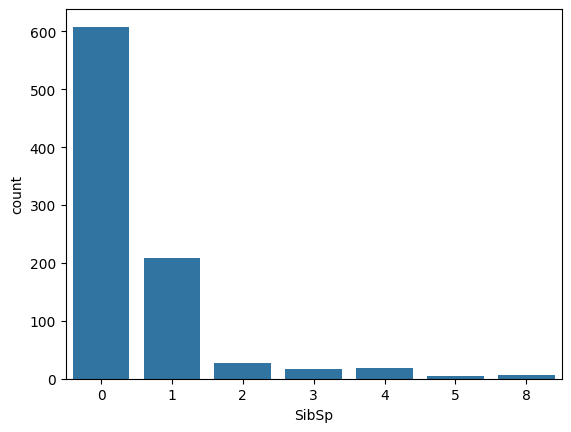

In [35]:
sns.countplot(train,x='SibSp')

<Axes: ylabel='Frequency'>

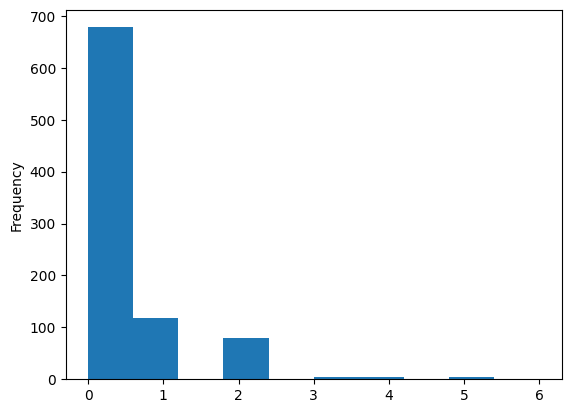

In [39]:
train['Parch'].plot(kind='hist')

<Axes: xlabel='Pclass', ylabel='Age'>

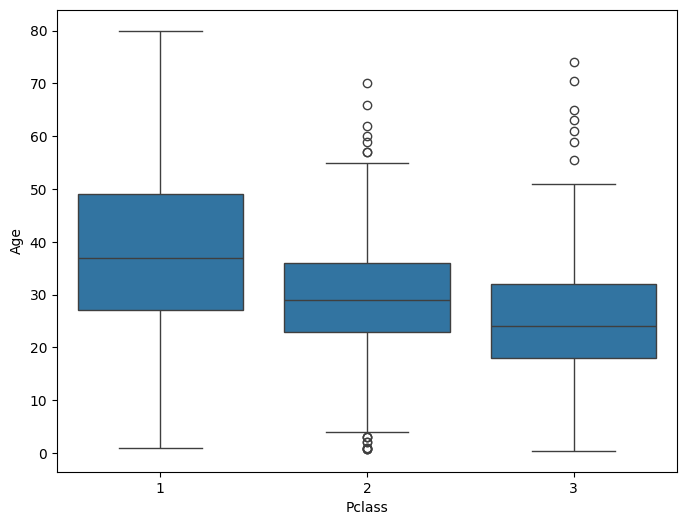

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(train,x='Pclass',y='Age')

In [81]:
def change(empty):
    Age= empty[0]
    Pclass= empty[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 25
    else: return Age

In [82]:
train['Age']=train[['Age','Pclass']].apply(change, axis=1)

C:\Users\tegae\AppData\Local\Temp\ipykernel_10484\3466133694.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\tegae\AppData\Local\Temp\ipykernel_10484\3466133694.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

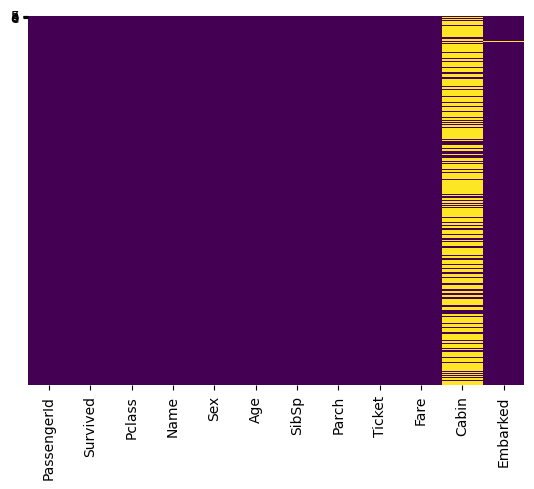

In [83]:
sns.heatmap(train.isnull(),cbar=False,yticklabels='False',cmap='viridis')

In [84]:
train=train.drop('Cabin',axis=1)

In [85]:
train.dropna(inplace=True)

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [87]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)

In [88]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [80]:
train = pd.read_csv(r'C:\Users\tegae\Documents\Python Tutorials\Python Bootcamp Files\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv')

In [89]:
Embarked=pd.get_dummies(train['Embarked'], drop_first=True)

In [90]:
train=pd.concat([train,Sex,Embarked],axis=1)

In [95]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [94]:
train[['male','Q','S']]=train[['male','Q','S']].astype(int)

In [101]:
train.drop(['PassengerId','Name','Sex','Ticket'],axis=1,inplace=True)

KeyError: "['PassengerId', 'Name', 'Sex', 'Ticket'] not found in axis"

In [102]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [99]:
train.drop(['Embarked'],axis=1,inplace=True)

In [103]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
logmodel= LogisticRegression()

In [109]:
results=logmodel.fit(X_train,y_train)

C:\Users\tegae\anaconda3\envs\islpenv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [110]:
y_pred=results.predict(X_test)

In [111]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [ ]:
from sklearn.cross_validation import cross_validation